# Perbandingan SMA, DMA, SES, DES, dan Holt-Winters pada Data Harga Telur Harian

---

**G1401231081 - Muhammad Hafiz Fazli**

# Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Telur Ayam Ras.csv')
df

,Date,Jawa Barat
0,2022-07-14,27680
1,2022-07-15,27920
2,2022-07-16,27960
3,2022-07-17,27890
4,2022-07-18,27950
...,...,...
631,2024-04-05,28620
632,2024-04-06,28660
633,2024-04-07,28740
634,2024-04-08,28770


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        636 non-null    object
 1   Jawa Barat  636 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [4]:
import datetime as dt

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
display(df.head())
display(df.info())

,Date,Jawa Barat
0,2022-07-14,27680
1,2022-07-15,27920
2,2022-07-16,27960
3,2022-07-17,27890
4,2022-07-18,27950


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        636 non-null    datetime64[ns]
 1   Jawa Barat  636 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.1 KB


None

In [5]:
df = df.iloc[479:, :]
df.reset_index(drop=True, inplace=True)
df

,Date,Jawa Barat
0,2023-11-05,25640
1,2023-11-06,26290
2,2023-11-07,26490
3,2023-11-08,26850
4,2023-11-09,26920
...,...,...
152,2024-04-05,28620
153,2024-04-06,28660
154,2024-04-07,28740
155,2024-04-08,28770


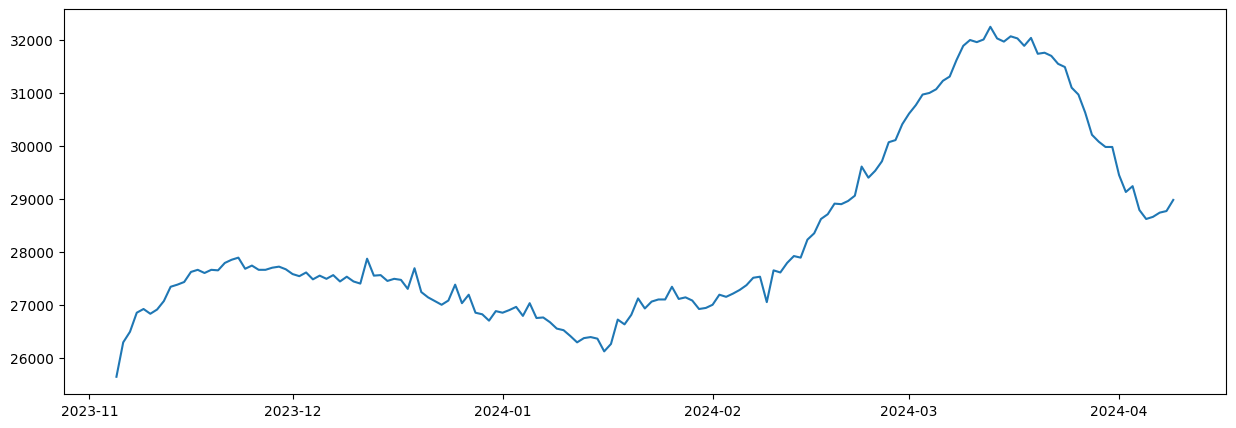

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Jawa Barat'])
plt.show()

# Train-Test Split

In [7]:
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

display(train_df.head(), train_df.tail())
display(test_df.head(), test_df.tail())


,Date,Jawa Barat
0,2023-11-05,25640
1,2023-11-06,26290
2,2023-11-07,26490
3,2023-11-08,26850
4,2023-11-09,26920


,Date,Jawa Barat
120,2024-03-04,31000
121,2024-03-05,31070
122,2024-03-06,31230
123,2024-03-07,31310
124,2024-03-08,31620


,Date,Jawa Barat
125,2024-03-09,31890
126,2024-03-10,32000
127,2024-03-11,31960
128,2024-03-12,32010
129,2024-03-13,32250


,Date,Jawa Barat
152,2024-04-05,28620
153,2024-04-06,28660
154,2024-04-07,28740
155,2024-04-08,28770
156,2024-04-09,28980


# Testing Various Forecasting (Smoothing) Methods

## Simple Moving Average

In [8]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
for w in range(2, 61):
    sma = train_df['Jawa Barat'].rolling(window=w).mean()
    last_sma = sma.dropna().iloc[-1]

    y_pred = [last_sma] * len(test_df)

    mae = mean_absolute_error(test_df['Jawa Barat'], y_pred)
    mape = mean_absolute_percentage_error(test_df['Jawa Barat'], y_pred)

    print(f"Window {w:2d} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")


Window  2 | MAE: 1157.81 | MAPE: 3.90%
Window  3 | MAE: 1157.81 | MAPE: 3.89%
Window  4 | MAE: 1157.81 | MAPE: 3.88%
Window  5 | MAE: 1157.81 | MAPE: 3.87%
Window  6 | MAE: 1157.81 | MAPE: 3.87%
Window  7 | MAE: 1157.81 | MAPE: 3.86%
Window  8 | MAE: 1159.53 | MAPE: 3.86%
Window  9 | MAE: 1164.13 | MAPE: 3.86%
Window 10 | MAE: 1173.44 | MAPE: 3.88%
Window 11 | MAE: 1182.98 | MAPE: 3.90%
Window 12 | MAE: 1194.69 | MAPE: 3.93%
Window 13 | MAE: 1206.32 | MAPE: 3.95%
Window 14 | MAE: 1221.96 | MAPE: 3.99%
Window 15 | MAE: 1233.81 | MAPE: 4.02%
Window 16 | MAE: 1250.62 | MAPE: 4.07%
Window 17 | MAE: 1266.56 | MAPE: 4.11%
Window 18 | MAE: 1281.35 | MAPE: 4.15%
Window 19 | MAE: 1296.92 | MAPE: 4.19%
Window 20 | MAE: 1315.19 | MAPE: 4.24%
Window 21 | MAE: 1336.06 | MAPE: 4.30%
Window 22 | MAE: 1363.47 | MAPE: 4.38%
Window 23 | MAE: 1396.21 | MAPE: 4.48%
Window 24 | MAE: 1432.42 | MAPE: 4.59%
Window 25 | MAE: 1465.21 | MAPE: 4.68%
Window 26 | MAE: 1497.67 | MAPE: 4.78%
Window 27 | MAE: 1530.64 

**Best Parameters:** 
> Window  7 | MAE: 1157.81 | MAPE: 3.86%

## Double Moving Average

In [10]:
for w in range(2, 61):
    sma1 = train_df['Jawa Barat'].rolling(window=w).mean()
    sma2 = sma1.rolling(window=w).mean()

    forecast = 2 * sma1 - sma2
    last_dma = forecast.dropna().iloc[-1]

    y_pred = [last_dma] * len(test_df)

    mae = mean_absolute_error(test_df['Jawa Barat'], y_pred)
    mape = mean_absolute_percentage_error(test_df['Jawa Barat'], y_pred)

    print(f"Window {w:2d} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

Window  2 | MAE: 1163.12 | MAPE: 3.93%
Window  3 | MAE: 1161.15 | MAPE: 3.92%
Window  4 | MAE: 1158.12 | MAPE: 3.90%
Window  5 | MAE: 1157.86 | MAPE: 3.90%
Window  6 | MAE: 1161.15 | MAPE: 3.92%
Window  7 | MAE: 1166.41 | MAPE: 3.94%
Window  8 | MAE: 1171.45 | MAPE: 3.96%
Window  9 | MAE: 1174.66 | MAPE: 3.98%
Window 10 | MAE: 1173.57 | MAPE: 3.97%
Window 11 | MAE: 1174.43 | MAPE: 3.98%
Window 12 | MAE: 1170.62 | MAPE: 3.96%
Window 13 | MAE: 1166.72 | MAPE: 3.94%
Window 14 | MAE: 1163.37 | MAPE: 3.93%
Window 15 | MAE: 1166.19 | MAPE: 3.94%
Window 16 | MAE: 1162.13 | MAPE: 3.92%
Window 17 | MAE: 1159.91 | MAPE: 3.91%
Window 18 | MAE: 1158.31 | MAPE: 3.90%
Window 19 | MAE: 1157.81 | MAPE: 3.90%
Window 20 | MAE: 1157.81 | MAPE: 3.90%
Window 21 | MAE: 1157.81 | MAPE: 3.90%
Window 22 | MAE: 1157.81 | MAPE: 3.89%
Window 23 | MAE: 1157.81 | MAPE: 3.88%
Window 24 | MAE: 1157.81 | MAPE: 3.87%
Window 25 | MAE: 1157.81 | MAPE: 3.87%
Window 26 | MAE: 1157.81 | MAPE: 3.86%
Window 27 | MAE: 1160.57 

**Best Parameters:**
> Window 26 | MAE: 1157.81 | MAPE: 3.86%

## Simple Exponential Smoothing

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

for alpha in np.arange(0.01, 1.00, 0.01):
    model = SimpleExpSmoothing(train_df['Jawa Barat'], initialization_method='legacy-heuristic')
    fit = model.fit(smoothing_level=alpha, optimized=False)

    forecast = [fit.fittedvalues.iloc[-1]] * len(test_df)

    mae = mean_absolute_error(test_df['Jawa Barat'], forecast)
    mape = mean_absolute_percentage_error(test_df['Jawa Barat'], forecast)

    print(f"Alpha {alpha:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

Alpha 0.01 | MAE: 3483.08 | MAPE: 11.17%
Alpha 0.02 | MAE: 2718.53 | MAPE: 8.68%
Alpha 0.03 | MAE: 2236.03 | MAPE: 7.10%
Alpha 0.04 | MAE: 1918.49 | MAPE: 6.08%
Alpha 0.05 | MAE: 1727.03 | MAPE: 5.48%
Alpha 0.06 | MAE: 1597.02 | MAPE: 5.08%
Alpha 0.07 | MAE: 1502.14 | MAPE: 4.80%
Alpha 0.08 | MAE: 1422.89 | MAPE: 4.56%
Alpha 0.09 | MAE: 1355.11 | MAPE: 4.35%
Alpha 0.10 | MAE: 1313.76 | MAPE: 4.23%
Alpha 0.11 | MAE: 1285.51 | MAPE: 4.16%
Alpha 0.12 | MAE: 1266.73 | MAPE: 4.11%
Alpha 0.13 | MAE: 1250.30 | MAPE: 4.07%
Alpha 0.14 | MAE: 1235.87 | MAPE: 4.03%
Alpha 0.15 | MAE: 1223.12 | MAPE: 4.00%
Alpha 0.16 | MAE: 1211.80 | MAPE: 3.97%
Alpha 0.17 | MAE: 1203.96 | MAPE: 3.95%
Alpha 0.18 | MAE: 1197.95 | MAPE: 3.94%
Alpha 0.19 | MAE: 1192.54 | MAPE: 3.92%
Alpha 0.20 | MAE: 1187.68 | MAPE: 3.91%
Alpha 0.21 | MAE: 1183.28 | MAPE: 3.90%
Alpha 0.22 | MAE: 1179.28 | MAPE: 3.89%
Alpha 0.23 | MAE: 1175.65 | MAPE: 3.89%
Alpha 0.24 | MAE: 1172.34 | MAPE: 3.88%
Alpha 0.25 | MAE: 1169.31 | MAPE: 3.87%

In [12]:
fit_auto = SimpleExpSmoothing(train_df['Jawa Barat'], initialization_method='estimated').fit(optimized=True)
forecast_auto = [fit_auto.fittedvalues.iloc[-1]] * len(test_df)

mae_auto = mean_absolute_error(test_df['Jawa Barat'], forecast_auto)
mape_auto = mean_absolute_percentage_error(test_df['Jawa Barat'], forecast_auto)

print(f"MAE: {mae_auto:.2f} | MAPE: {mape_auto:.2f}%")

MAE: 1157.81 | MAPE: 3.88%


**Best Parameters:**
> Alpha 0.35 | MAE: 1157.81 | MAPE: 3.85%

## Double Exponential Smoothing

In [13]:
from statsmodels.tsa.holtwinters import Holt

for alpha in np.arange(0.1, 1.0, 0.1):
    for beta in np.arange(0.1, 1.0, 0.1):
        try:
            model = Holt(train_df['Jawa Barat'], initialization_method='legacy-heuristic')
            fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)

            y_pred = [fit.forecast(len(test_df)).iloc[-1]] * len(test_df)

            mae = mean_absolute_error(test_df['Jawa Barat'], y_pred)
            mape = mean_absolute_percentage_error(test_df['Jawa Barat'], y_pred)

            print(f"α={alpha:.1f}, β={beta:.1f} | MAE={mae:.2f}, MAPE={mape:.2f}%")
        except Exception as e:
            print(f"α={alpha:.1f}, β={beta:.1f} | Error: {e}")


α=0.1, β=0.1 | MAE=5873.30, MAPE=19.32%
α=0.1, β=0.2 | MAE=6847.93, MAPE=22.50%
α=0.1, β=0.3 | MAE=6691.40, MAPE=21.99%
α=0.1, β=0.4 | MAE=5707.18, MAPE=18.78%
α=0.1, β=0.5 | MAE=5012.85, MAPE=16.52%
α=0.1, β=0.6 | MAE=5166.33, MAPE=17.02%
α=0.1, β=0.7 | MAE=5895.53, MAPE=19.40%
α=0.1, β=0.8 | MAE=6524.91, MAPE=21.45%
α=0.1, β=0.9 | MAE=6467.74, MAPE=21.26%
α=0.2, β=0.1 | MAE=5863.61, MAPE=19.29%
α=0.2, β=0.2 | MAE=5992.45, MAPE=19.71%
α=0.2, β=0.3 | MAE=5660.38, MAPE=18.63%
α=0.2, β=0.4 | MAE=5564.99, MAPE=18.32%
α=0.2, β=0.5 | MAE=5321.22, MAPE=17.52%
α=0.2, β=0.6 | MAE=4901.53, MAPE=16.16%
α=0.2, β=0.7 | MAE=4455.02, MAPE=14.70%
α=0.2, β=0.8 | MAE=3941.97, MAPE=13.03%
α=0.2, β=0.9 | MAE=3355.58, MAPE=11.12%
α=0.3, β=0.1 | MAE=5677.95, MAPE=18.69%
α=0.3, β=0.2 | MAE=5711.64, MAPE=18.80%
α=0.3, β=0.3 | MAE=5417.80, MAPE=17.84%
α=0.3, β=0.4 | MAE=5050.87, MAPE=16.64%
α=0.3, β=0.5 | MAE=4625.70, MAPE=15.26%
α=0.3, β=0.6 | MAE=4237.68, MAPE=13.99%
α=0.3, β=0.7 | MAE=4004.59, MAPE=13.23%


In [14]:
auto_model = Holt(train_df['Jawa Barat'], initialization_method='estimated')
auto_fit = auto_model.fit(optimized=True)

forecast_auto = [auto_fit.forecast(len(test_df)).iloc[-1]] * len(test_df)

mae_auto = mean_absolute_error(test_df['Jawa Barat'], forecast_auto)
mape_auto = mean_absolute_percentage_error(test_df['Jawa Barat'], forecast_auto)

print(f"MAE: {mae_auto:.2f}, MAPE: {mape_auto:.2f}%")


MAE: 5648.18, MAPE: 18.59%


**Best Parameters:**
> α=0.2, β=0.9 | MAE=3355.58, MAPE=11.12%

## Holt-Winters

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

for seasonal in [None, 'add', 'mul']:
    for sp in [7, 14, 21, 30, 60]:
        try:
            model = ExponentialSmoothing(
                train_df['Jawa Barat'],
                trend='add',
                seasonal=seasonal,
                seasonal_periods=sp if seasonal else None,
                initialization_method='estimated'
            )

            fit = model.fit(optimized=True)
            y_pred = [fit.forecast(len(test_df)).iloc[-1]] * len(test_df)

            mae = mean_absolute_error(test_df['Jawa Barat'], y_pred)
            mape = mean_absolute_percentage_error(test_df['Jawa Barat'], y_pred)


            print(f"Seasonal: {seasonal or 'None':>3}, Period: {sp:3} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

        except Exception as e:
            print(f"Seasonal: {seasonal}, Period: {sp} | Error: {e}")


Seasonal: None, Period:   7 | MAE: 5648.18 | MAPE: 18.59%
Seasonal: None, Period:  14 | MAE: 5648.18 | MAPE: 18.59%
Seasonal: None, Period:  21 | MAE: 5648.18 | MAPE: 18.59%
Seasonal: None, Period:  30 | MAE: 5648.18 | MAPE: 18.59%
Seasonal: None, Period:  60 | MAE: 5648.18 | MAPE: 18.59%
Seasonal: add, Period:   7 | MAE: 5756.09 | MAPE: 18.94%
Seasonal: add, Period:  14 | MAE: 5891.41 | MAPE: 19.38%
Seasonal: add, Period:  21 | MAE: 4855.55 | MAPE: 16.01%


c:\Users\Muhammad Hafiz F\Documents\ali\2025-2026 (Sem 5)\STA1341-MPDW\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Muhammad Hafiz F\Documents\ali\2025-2026 (Sem 5)\STA1341-MPDW\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Seasonal: add, Period:  30 | MAE: 5415.65 | MAPE: 17.83%
Seasonal: add, Period:  60 | MAE: 6080.83 | MAPE: 20.00%
Seasonal: mul, Period:   7 | MAE: 5763.46 | MAPE: 18.97%
Seasonal: mul, Period:  14 | MAE: 5924.03 | MAPE: 19.49%
Seasonal: mul, Period:  21 | MAE: 5107.80 | MAPE: 16.83%
Seasonal: mul, Period:  30 | MAE: 4977.81 | MAPE: 16.41%
Seasonal: mul, Period:  60 | MAE: 1349.04 | MAPE: 4.58%


c:\Users\Muhammad Hafiz F\Documents\ali\2025-2026 (Sem 5)\STA1341-MPDW\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


**Best Parameters:**
> Seasonal: mul, Period:  60 | MAE: 1349.04 | MAPE: 4.58%

# Conclusion

## Ranking of Best Performing Model

### 1. Simple Moving Average (SMA)

**Best Parameters:**  
- `Window = 7`  

**Performance:**  
- **MAE** = 1,157.81  
- **MAPE** = 3.86%

---

### 2. Double Moving Average (DMA)

**Best Parameters:**  
- `Window = 26`  

**Performance:**  
- **MAE** = 1,157.81  
- **MAPE** = 3.86%

---

### 3. Simple Exponential Smoothing (SES)

**Best Parameters:**  
- `Alpha = 0.35`  

**Performance:**  
- **MAE** = 1,157.81  
- **MAPE** = 3.85%

---

### 4. Holt-Winters (Triple Exponential Smoothing)

**Best Parameters:**  
- `Seasonal = 'multiplicative'`  
- `Seasonal Period = 60`  

**Performance:**  
- **MAE** = 1,349.04  
- **MAPE** = 4.58%

---

### 5. Double Exponential Smoothing (DES / Holt’s Linear Trend)

**Best Parameters:**  
- `Alpha = 0.2`  
- `Beta = 0.9`  

**Performance:**  
- **MAE** = 3,355.58  
- **MAPE** = 11.12%


## Results and Discussion

### Metodologi
Untuk mengevaluasi efektivitas berbagai metode smoothing terhadap data harga telur harian, dilakukan pemisahan data menjadi **train** dan **test** (80:20), lalu diterapkan masing-masing metode dengan pendekatan sebagai berikut:

- **SMA (Simple Moving Average)** dan **DMA (Double Moving Average):**  
  Dilakukan *grid search* pada rentang `window` dari 2 sampai 60.

- **SES (Simple Exponential Smoothing):**  
  Grid search terhadap parameter `alpha` dari 0.01 hingga 0.99, dengan `optimized=False` untuk menghindari fitting otomatis.

- **DES (Double Exponential Smoothing / Holt):**  
  Grid search dua parameter: `smoothing_level` (α) dan `smoothing_slope` (β), masing-masing dari 0.1 hingga 0.9.

- **Holt-Winters (Triple Exponential Smoothing):**  
  Dilakukan pemilihan kombinasi `seasonal` (`None`, `'add'`, `'mul'`) dan `seasonal_periods` (7, 14, 21, 30, 60), dengan fitting otomatis (`optimized=True`) untuk mencari parameter smoothing terbaik.

---

### Hasil
1. **SMA, DMA, dan SES menghasilkan MAE dan MAPE yang identik hingga digit terakhir**:
   - **MAE: 1,157.81**
   - **MAPE: 3.85-3.86%**
   - Ini menunjukkan bahwa semua metode tersebut, meskipun secara teoritis berbeda, menghasilkan performa prediktif yang setara pada dataset ini. Hal ini bisa terjadi karena data yang cenderung **stabil atau halus**, sehingga metode berbasis *simple average* sudah cukup menangkap pola umumnya.

2. **Holt-Winters dan DES justru menunjukkan performa yang lebih buruk**:
   - DES: **MAE = 3,355.58**, **MAPE = 11.12%**
   - Holt-Winters terbaik (seasonal=multiplicative, period=60): **MAE = 1,349.04**, **MAPE = 4.58%**

---

### Pembahasan
- **DES performanya buruk karena** model ini mengasumsikan adanya **tren linier eksplisit** yang harus dipelajari, padahal data harga telur tampaknya **tidak memiliki tren jangka panjang yang konsisten** di seluruh periode.

- **Holt-Winters lebih baik dari DES**, tetapi tetap kalah dibanding metode sederhana karena:
  - Model cenderung **overfit** pada musiman buatan (modelnya mengira ada pola musiman namun kenyataannya hanya variasi biasa), terutama jika periode seasonal tidak merepresentasikan pola nyata (misalnya, *Ramadhan* yang berpindah setiap tahun).

- Sebaliknya, **SMA/DMA/SES lebih unggul** karena:
  - Mereka **tidak mencoba mengestimasi tren atau musim eksplisit**, melainkan cukup menghaluskan nilai terbaru berdasarkan riwayat data, yang ternyata **cukup representatif** untuk memprediksi harga dalam jangka pendek.

---

### Kesimpulan
Metode smoothing sederhana (SMA, DMA, SES) justru memberikan performa terbaik dalam kasus ini, baik dari sisi akurasi maupun stabilitas. Sementara itu, metode yang lebih kompleks tidak selalu memberikan hasil yang lebih baik, terutama jika data tidak mendukung struktur musiman atau tren jangka panjang yang konsisten.
